# Visualizer

This notebook can visualize the results for a specific test.

## Table of Contents

1. [Configuration](#Configuration)
2. [Tests Overview](#Tests-Overview)
    1. [Visualize a Test](#Visualize-a-Test)
        1. [System Specifications](#System-Specifications)
        2. [Test Results](#Test-Results)
        3. [Monitor Results](#Monitor-Results)
            1. [Switches](#Switches)
            2. [Clock Rates](#Clock-Rates)
            3. [Utilization Rates](#Utilization-Rates)
            4. [Power Consumption](#Power-Consumption)
            5. [Energy Consumption](#Energy-Consumption)
            6. [Fan Speed](#Fan-Speed)
            7. [Memory Consumption](#Memory-Consumption)
            8. [Processes](#Processes)
            9. [Temperature](#Temperature)
            10. [Kernel Coordinates](#Kernel-Coordinates)
            11. [Correlations](#Correlations)
            12. [Overview](#Overview)

## Configuration

Configure the project settings below.
The default configuration should be okay.
Make sure that you have run at least one test with the EnergyManager and have generated a test results database, otherwise this notebook will fail.

In [1]:
import pathlib

source_directory = pathlib.Path().parent.absolute()
project_directory = f"{source_directory}/.."
database = f"{project_directory}/../EnergyManager/Resources/Test Results/database.sqlite"

### Style

If uncommented the input cell below hides all input cells in this notebook once it is run.
Use `Cell > All Output > Clear` to restore the cells and modify the code.

In [2]:
%%html
<!--<style>
    div.input {
        display: none;
    }
</style>-->

## Tests Overview

Below all tests are shown.

In [3]:
from Visualizer.Testing.Test import Test

# Load all tests
tests = Test.load_all(database)

# Visualize the test data
tests_table = Test.tests_table(tests)
tests_table

,ID,Name
0,1,Fixed Frequency Matrix Multiply Test (CPU 0-972411712 | GPU 0-592500000)
1,2,Fixed Frequency Matrix Multiply Test (CPU 972411712-1944823424 | GPU 592500000-1185000000)
2,3,Fixed Frequency Matrix Multiply Test (CPU 1944823424-2917235136 | GPU 1185000000-1777500000)
3,4,Fixed Frequency Matrix Multiply Test (CPU 2917235136-3889646848 | GPU 1777500000-2370000000)
4,5,BLAH
5,6,BLAH
6,7,Fixed Frequency Matrix Multiply Test (CPU 0-972411712 | GPU 0-592500000)
7,8,Fixed Frequency Matrix Multiply Test (CPU 972411712-1944823424 | GPU 592500000-1185000000)
8,9,Fixed Frequency Matrix Multiply Test (CPU 1944823424-2917235136 | GPU 1185000000-1777500000)
9,10,Fixed Frequency Matrix Multiply Test (CPU 2917235136-3889646848 | GPU 1777500000-2370000000)


### Visualize a Test

Define the ID of the test you wish to visualize below.

In [4]:
test_id = tests[-1].id
test = [test for test in tests if test.id == test_id][0]
test_results = test.test_results

#### Test Summary

These are the specifications of the system with which the test was performed as well as general information about the test.

In [5]:
import pprint

summary = test_results.summary
pprint.pprint(summary)

{'GPU Brand': 'GeForce',
 'GPU Compute Capability Major Version': 7,
 'GPU Compute Capability Minor Version': 5,
 'GPU Default Auto Boosted Clocks Enabled': None,
 'GPU Default Power Limit (W)': '260.0',
 'GPU Memory Size (B)': '8.3 GB',
 'GPU Name': 'GeForce RTX 2080',
 'GPU PCIe Link Width (B)': '16 Bytes',
 'GPU Supported Core Clock Rates (Hz)': [''],
 'GPU Supported Memory Clock Rates (Hz)': [''],
 'Name': 'SyntheticGPUWorkloadTest (ActiveInactiveWorkload)'}


#### Test Results

These are the results returned directly in the test's output.

In [6]:
output_results = test_results.results
pprint.pprint(output_results)

{}


#### Monitor Results

These are the results returned by the monitors that ran during the test's execution.

In [7]:
monitor_results_table = test_results.monitor_results_table
monitor_results_table

,Timestamp,Monitor,Name,Value
0,2020-09-10 10:41:54.093,CPUMonitor,coreClockRate,3889676500
1,2020-09-10 10:41:54.093,CPUMonitor,coreClockRateCore0,3895812000
2,2020-09-10 10:41:54.093,CPUMonitor,coreClockRateCore1,3884187000
3,2020-09-10 10:41:54.093,CPUMonitor,coreClockRateCore2,3896769000
4,2020-09-10 10:41:54.093,CPUMonitor,coreClockRateCore3,3881938000
5,2020-09-10 10:41:54.093,CPUMonitor,coreUtilizationRate,0.674242
6,2020-09-10 10:41:54.093,CPUMonitor,coreUtilizationRateCore0,0.636364
7,2020-09-10 10:41:54.093,CPUMonitor,coreUtilizationRateCore1,0.909091
8,2020-09-10 10:41:54.093,CPUMonitor,coreUtilizationRateCore2,0.333333
9,2020-09-10 10:41:54.093,CPUMonitor,coreUtilizationRateCore3,0.818182


##### Switches

The graphs below shows the status of configuration switches over time.

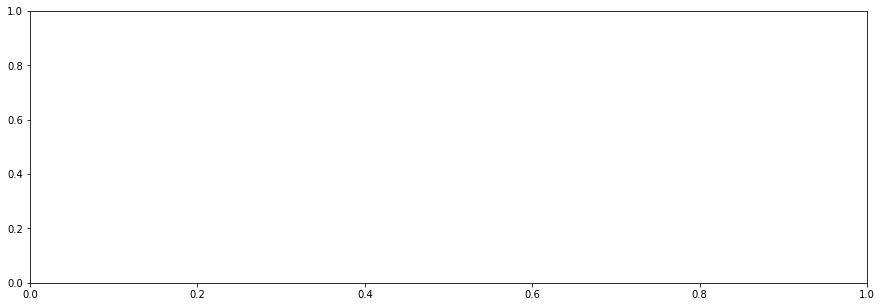

In [8]:
switches_plot = test_results.switches_plot()

##### Clock Rates

The graph below shows the clock rate over time.

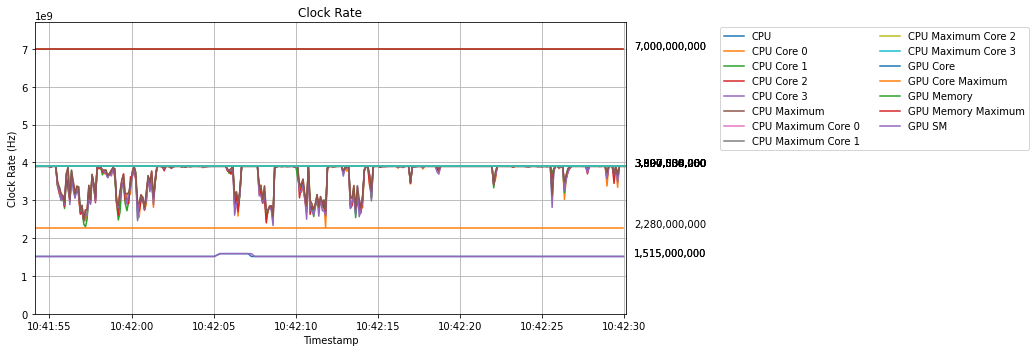

In [9]:
clock_rate_plot = test_results.clock_rate_plot(plot_limits=True)

##### Utilization Rates

The graph below shows the utilization rates over time.

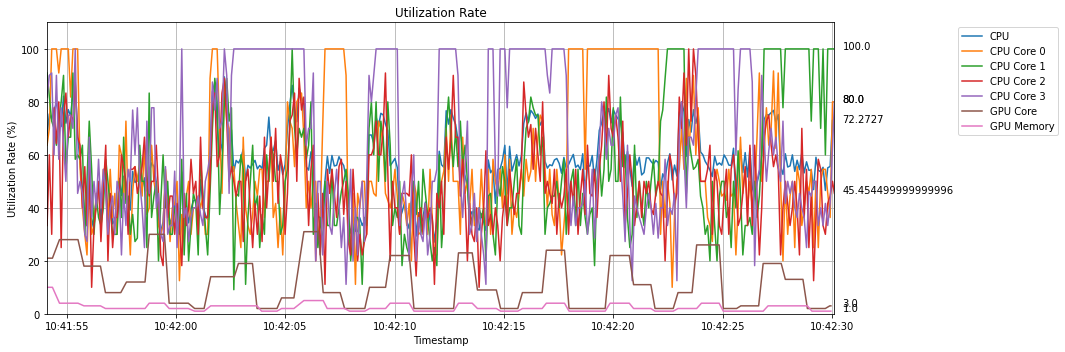

In [10]:
utilization_rate_plot = test_results.utilization_rate_plot()

##### Power Consumption

The graphs below shows the power consumption over time.

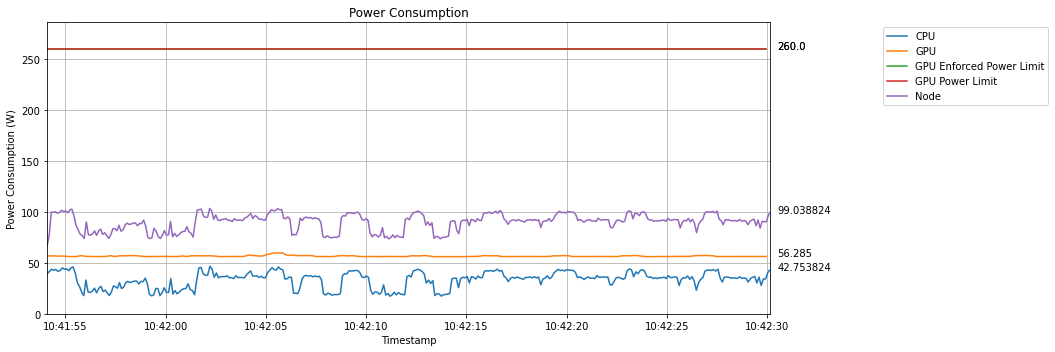

In [11]:
power_consumption_plot = test_results.power_consumption_plot(plot_limits=True)

##### Energy Consumption

The graphs below shows the total energy consumption over time.

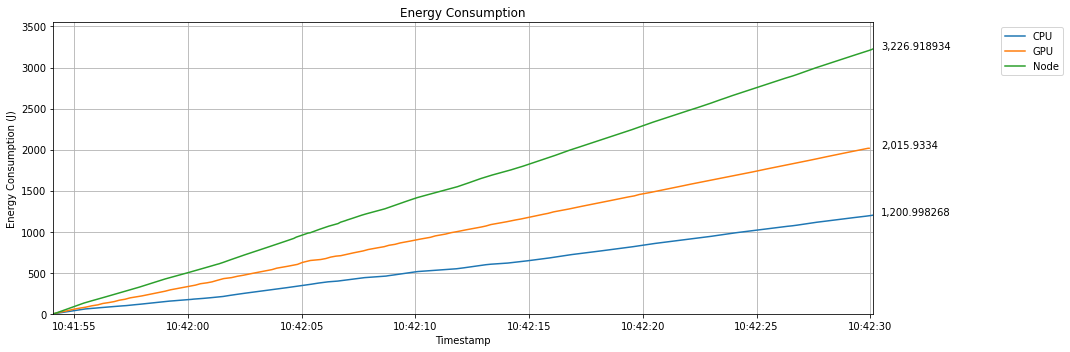

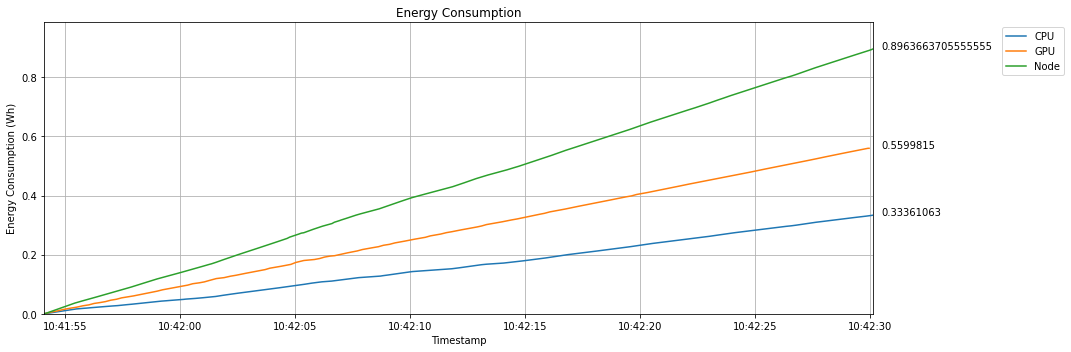

In [12]:
from Visualizer import Plotting

energy_consumption_j_plot = test_results.energy_consumption_plot()
energy_consumption_wh_plot = test_results.energy_consumption_plot(unit_string="Wh", modifier=Plotting.j_to_wh)

##### Fan Speed

The graphs below shows the fan speed over time.

/home/qub1-creation/Cloud/Nextcloud/Education/Vrije Universiteit/Master Project/Project/Visualizer/Source/Visualizer/Plotting.py:55: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  axes.set_ylim(((y_min - abs(0.1 * y_min)) if y_min < 0 else 0), (y_max + abs(0.1 * y_max)))


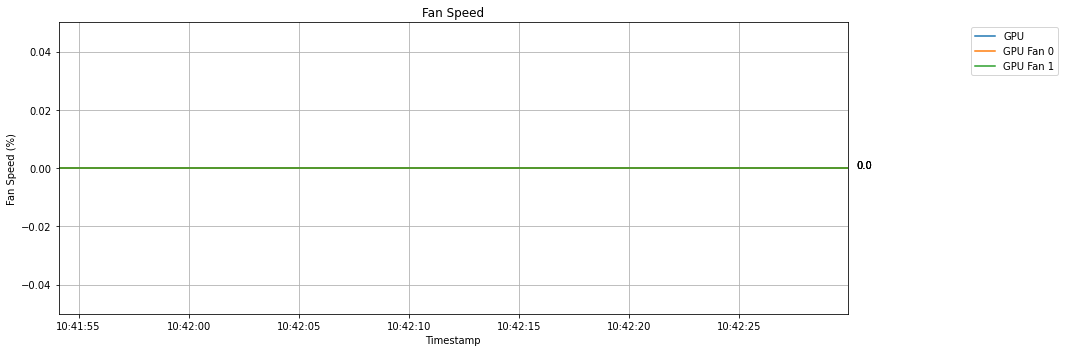

In [13]:
fan_speed_plot = test_results.fan_speed_plot()

##### Memory Consumption

The graphs below shows the memory consumption over time.

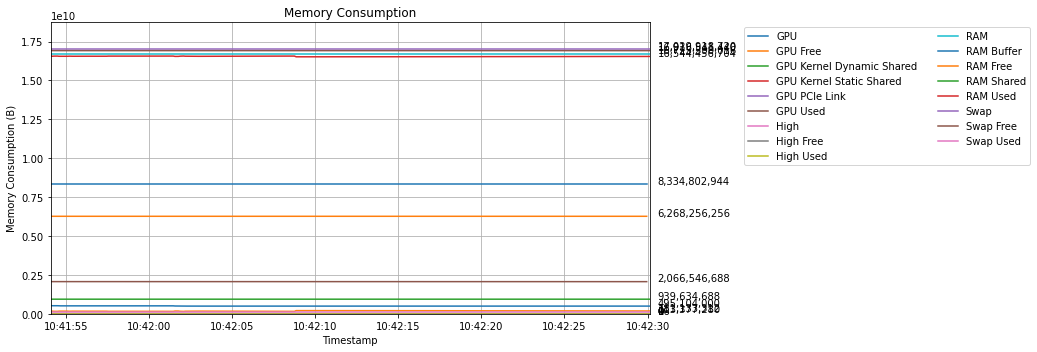

In [14]:
memory_consumption_plot = test_results.memory_consumption_plot(plot_sizes=True)

##### Processes

The graphs below shows the amount of processes over time.

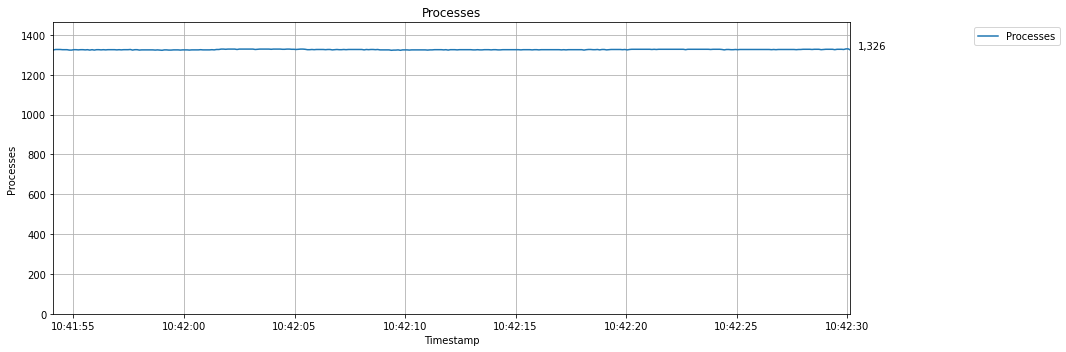

In [15]:
processes_plot = test_results.processes_plot()

##### Temperature

The graphs below shows the temperature over time.

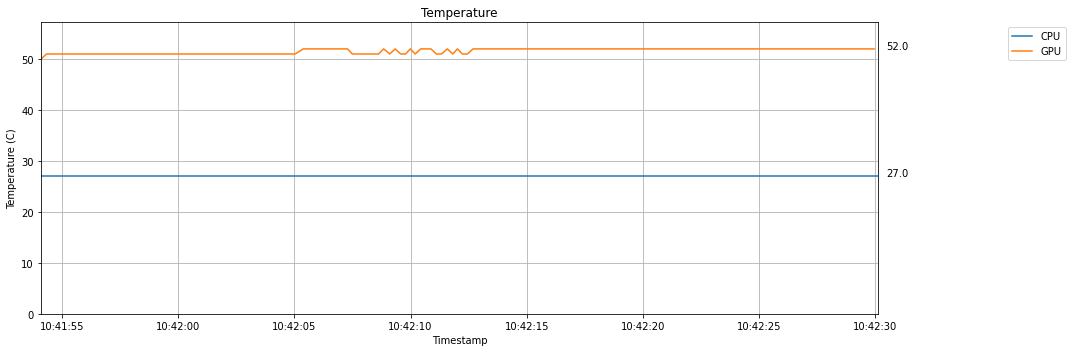

In [16]:
temperature_plot = test_results.temperature_plot()

##### Kernel Coordinates

The graph below shows the coordinates that the kernel is currently covering.

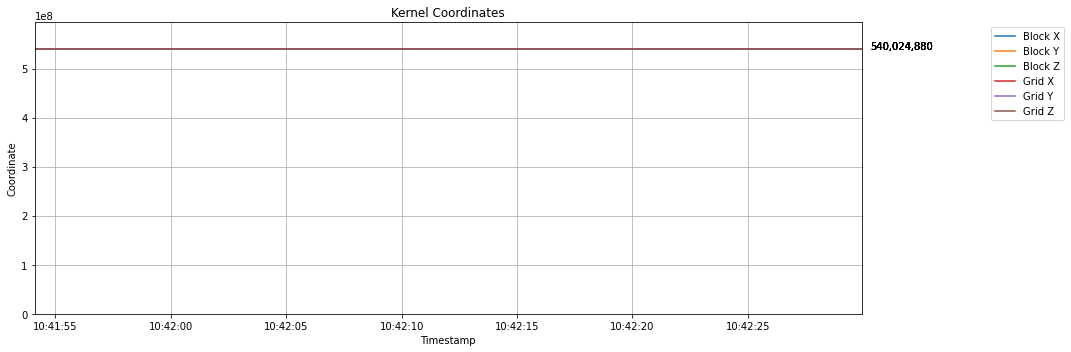

In [17]:
kernel_coordinates_plot = test_results.kernel_coordinates_plot()

##### Correlations

The graph below shows the Pearson correlation heatmap.

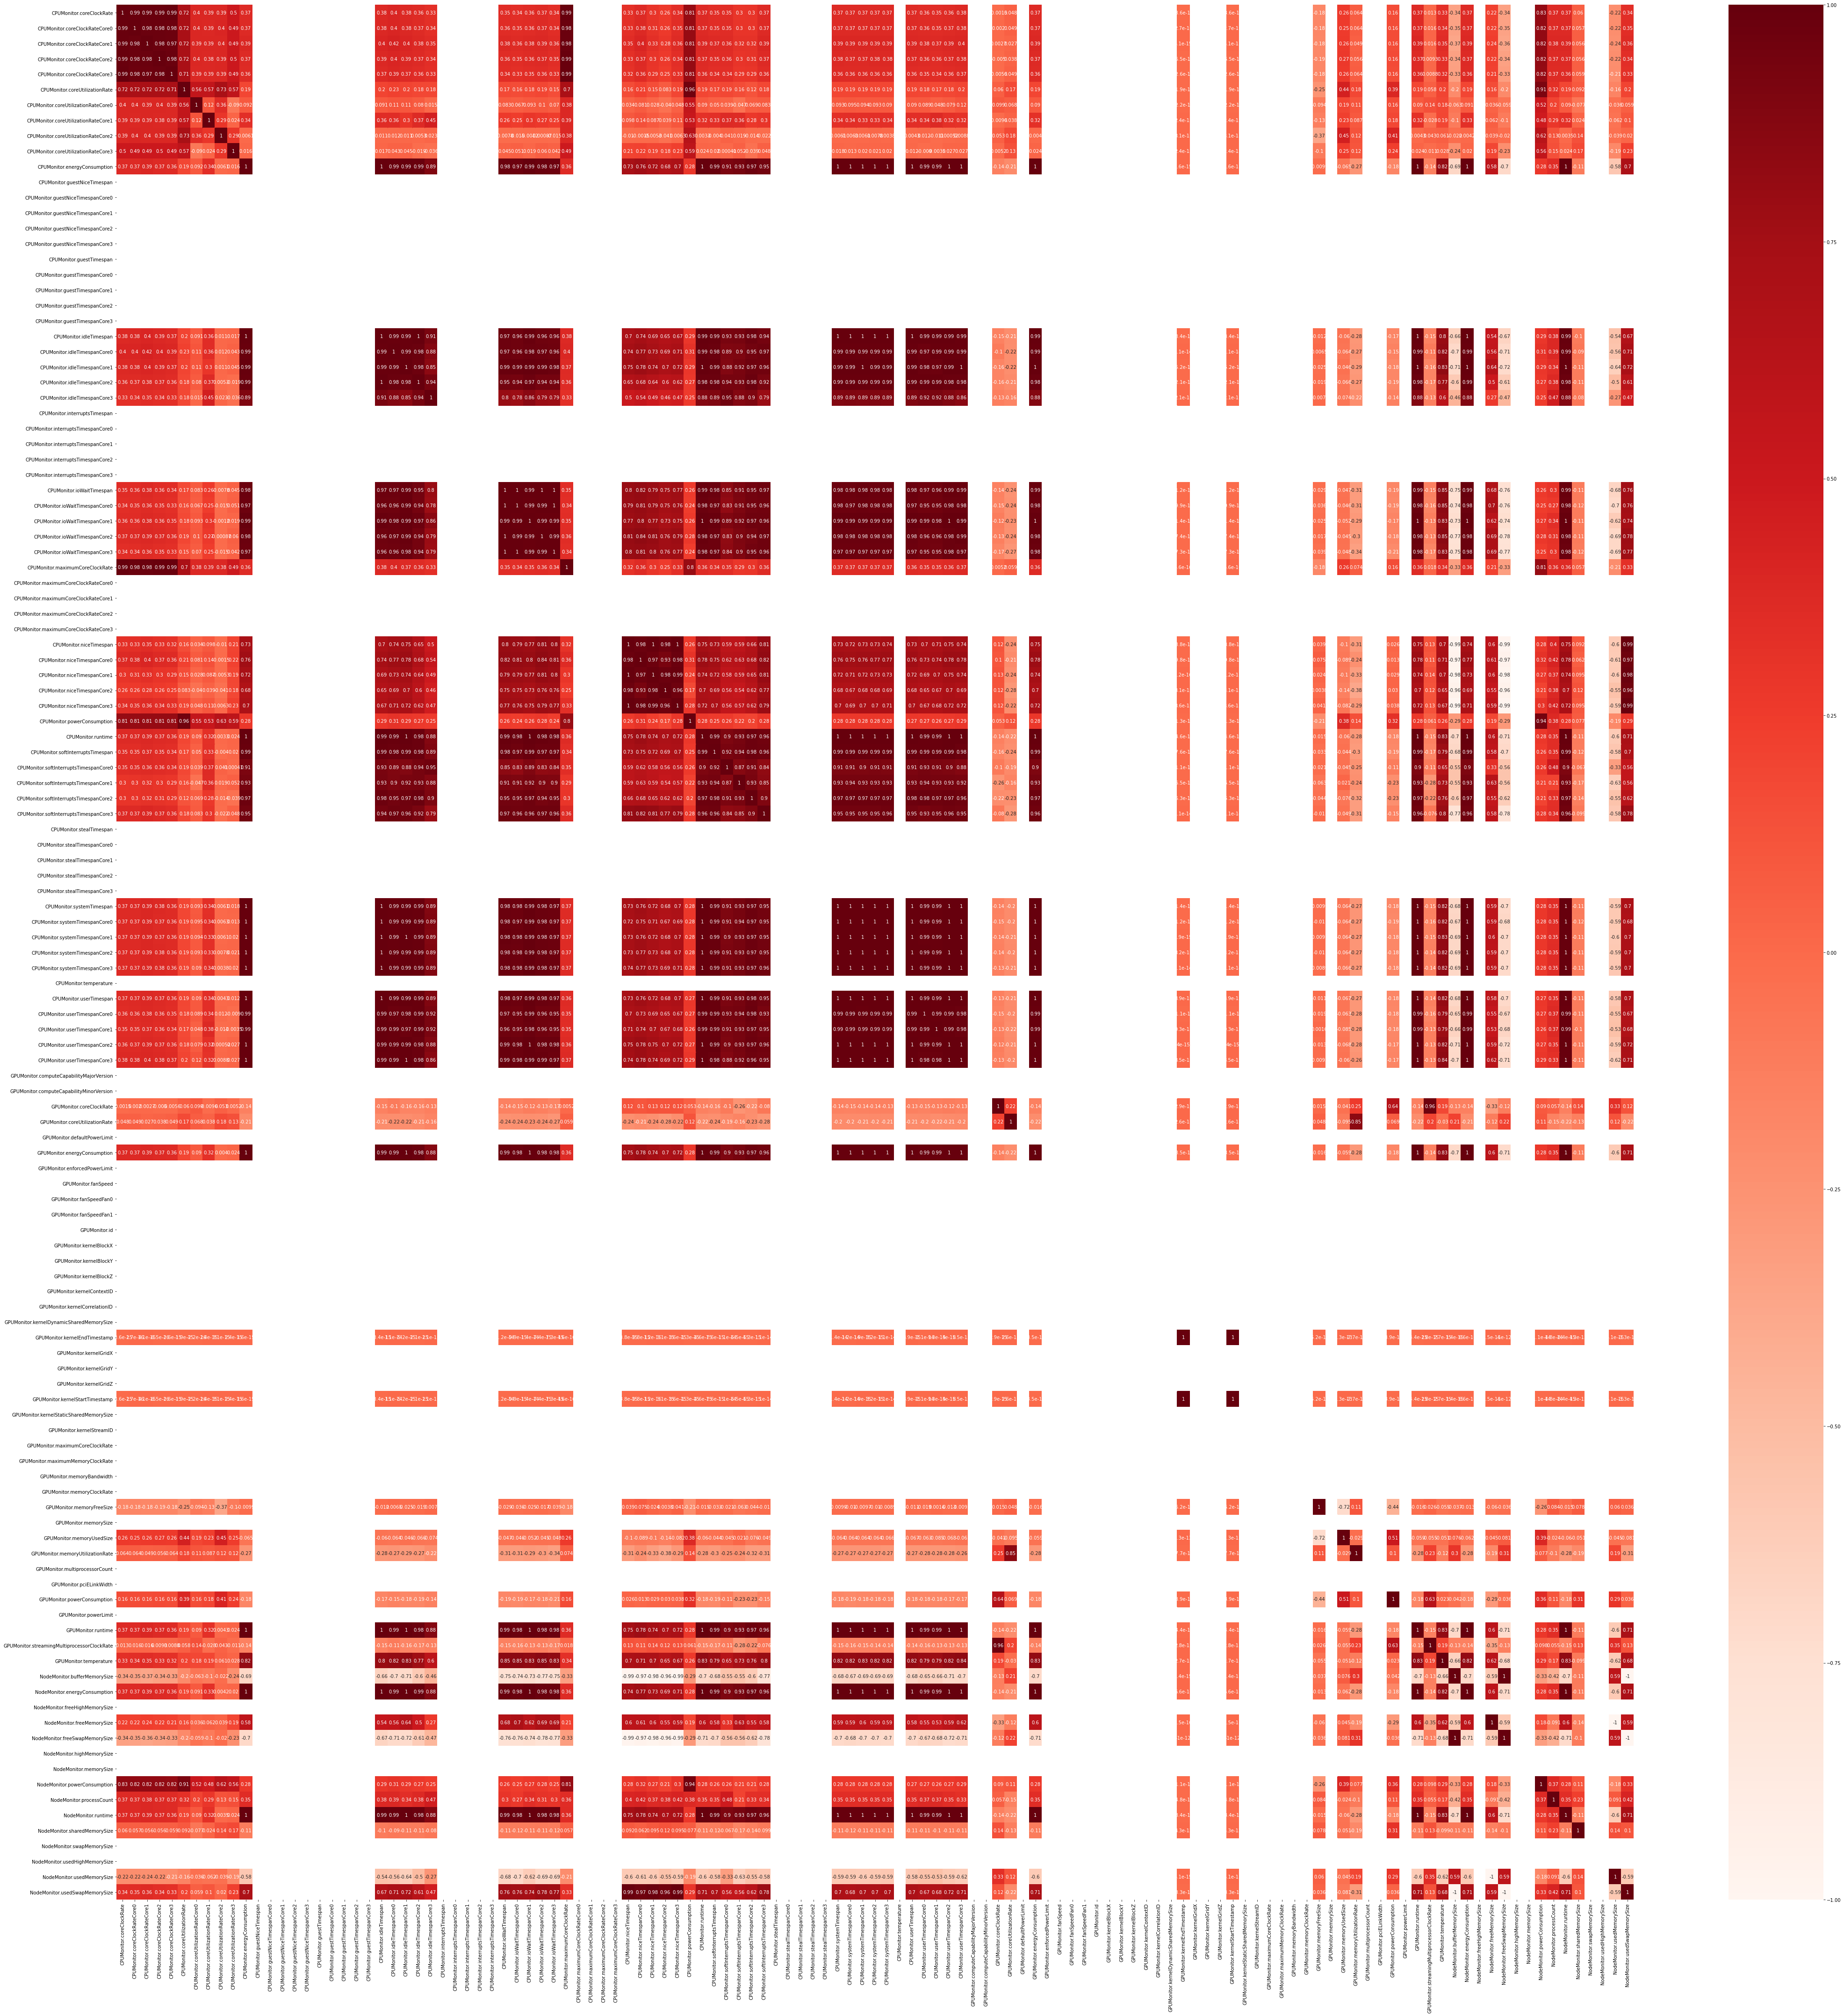

In [18]:
correlations_plot = test_results.correlations_plot()

##### Overview

The graph image below summarizes the graphs above.

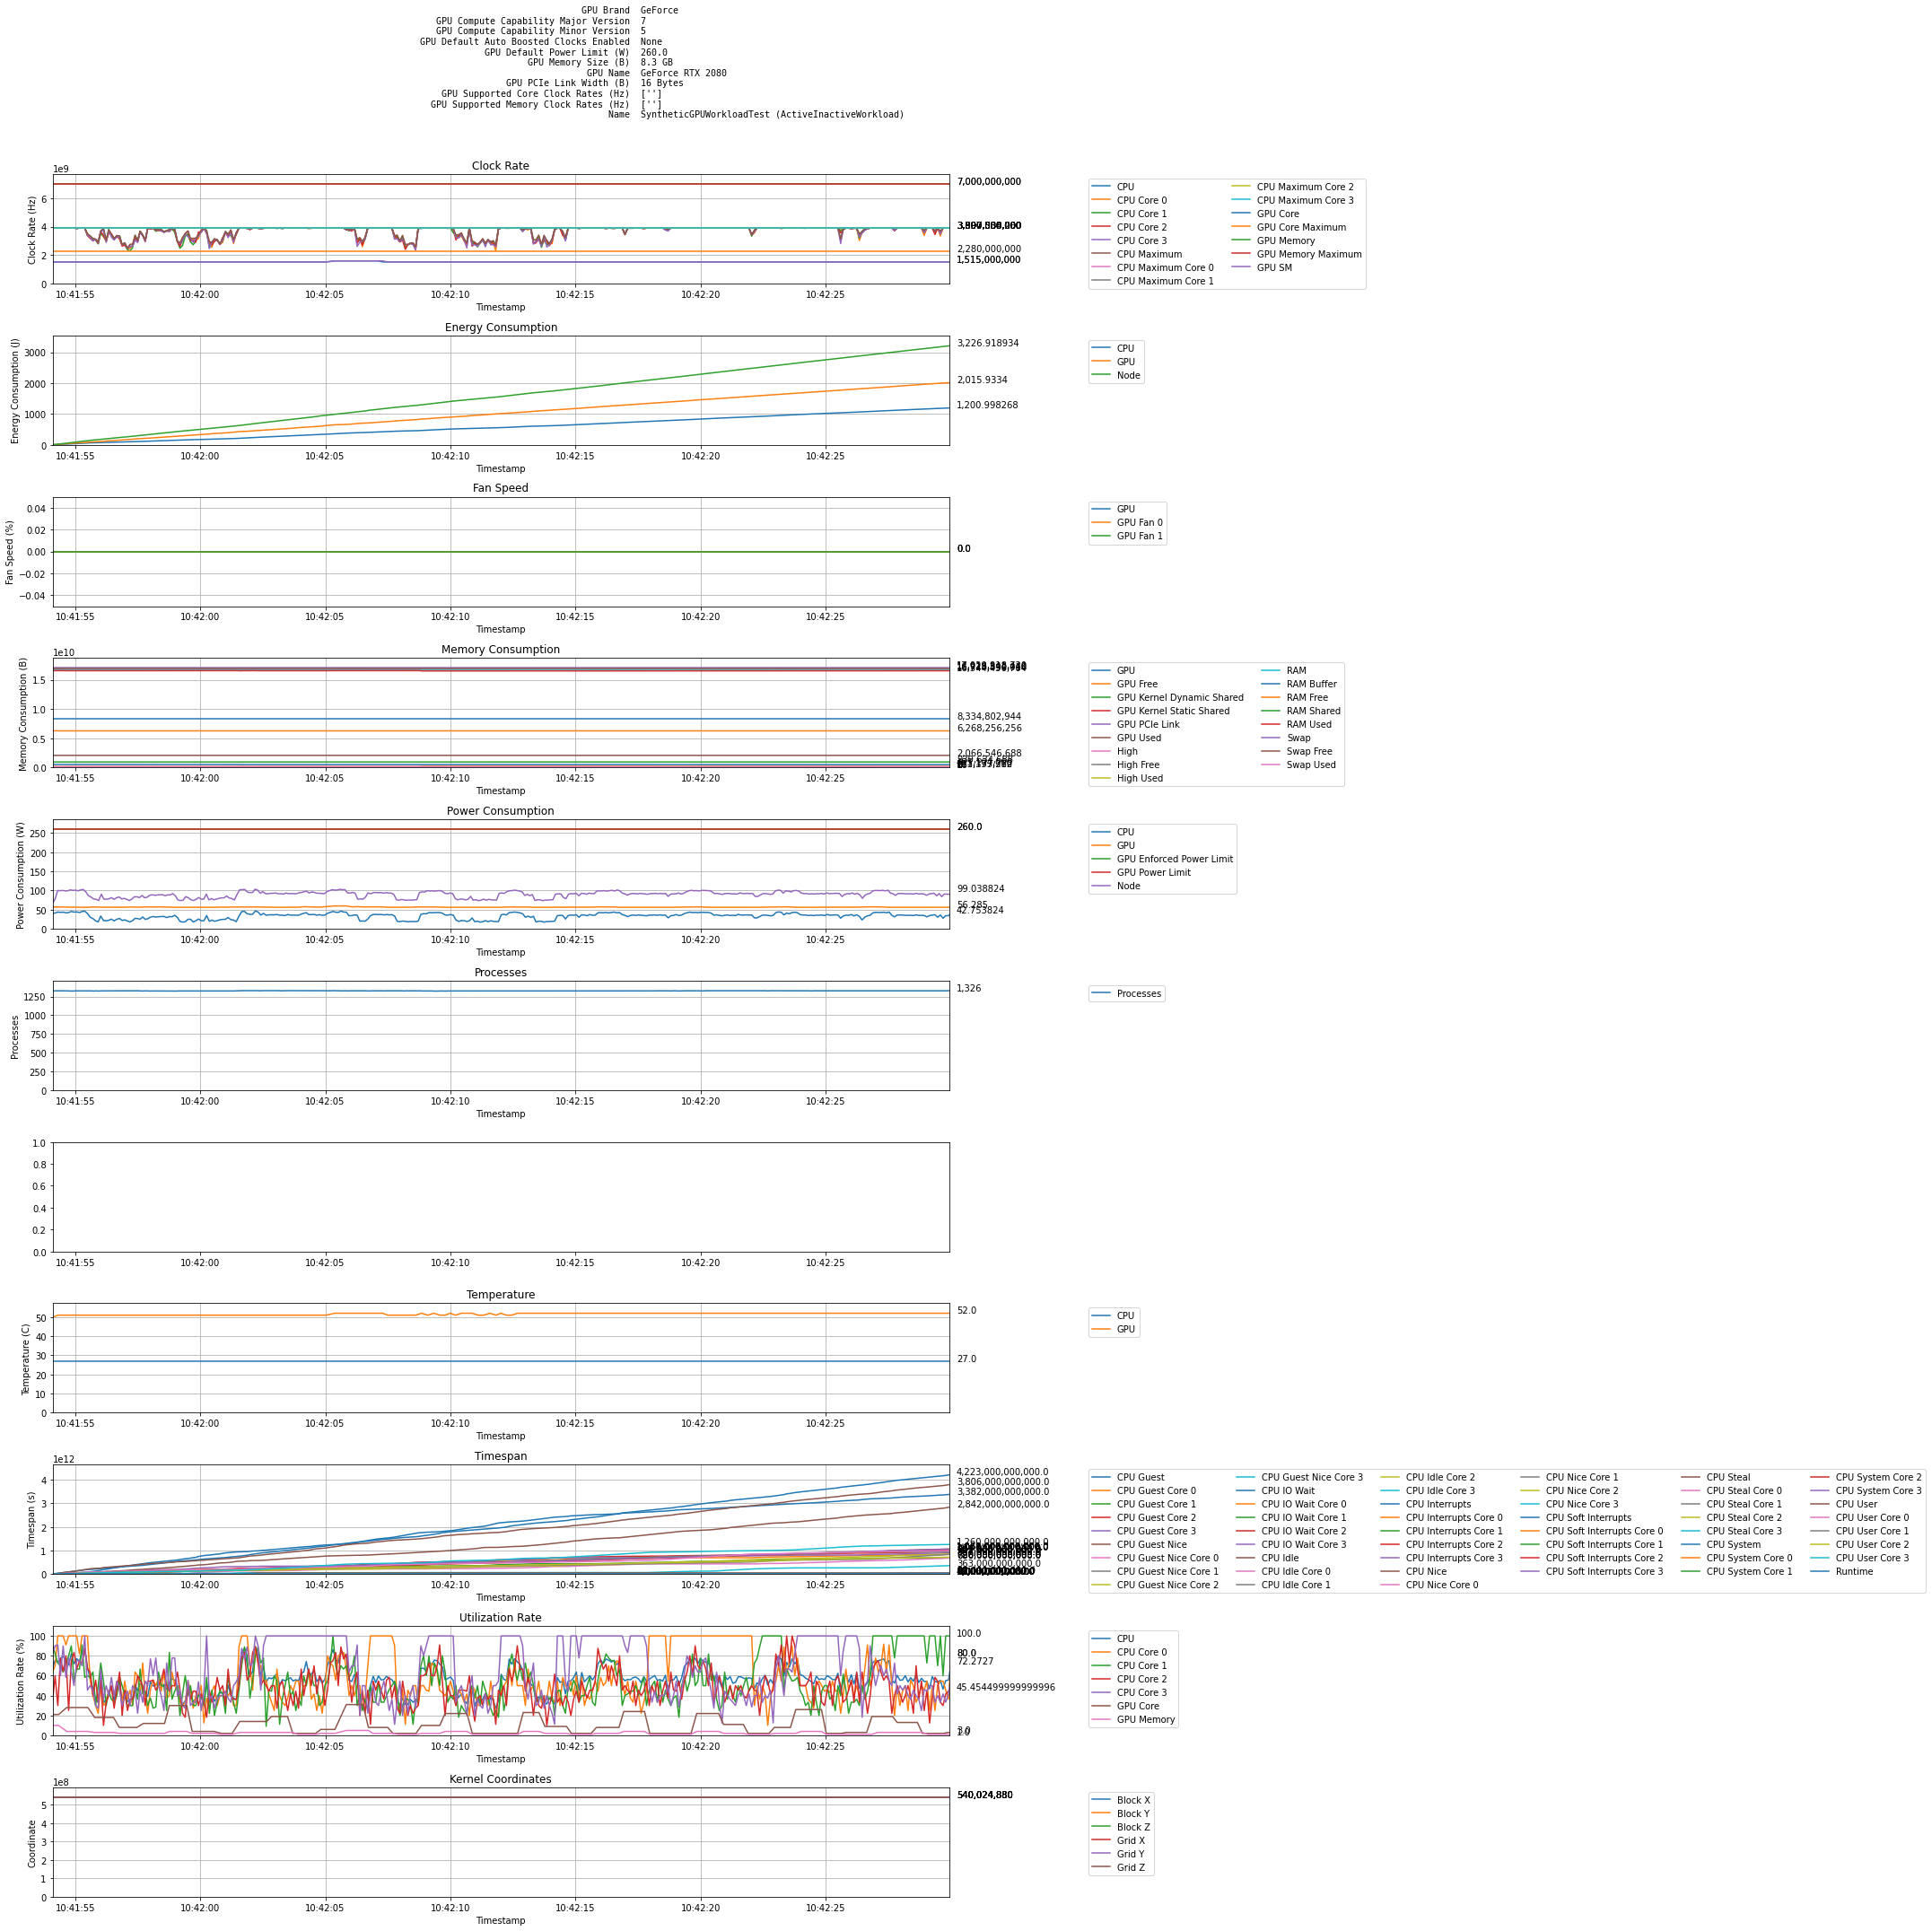

In [19]:
overview_plot = test_results.overview_plot()